# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Set your project path 
project_path =  '/content/drive/My Drive/NLP/Sequential NLP/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_json("/content/drive/My Drive/NLP/Sequential NLP/Sarcasm_Headlines_Dataset.json",lines = True)

In [6]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
data.shape

(26709, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [9]:
data['is_sarcastic'].nunique()

2

In [10]:
data["is_sarcastic"].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [11]:
data.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [12]:
data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


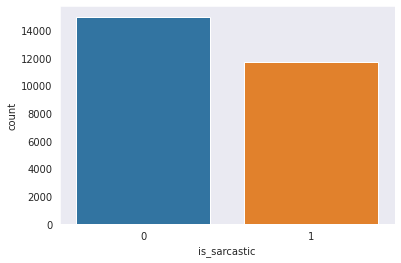

In [13]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(data.is_sarcastic)

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [14]:
data=data.drop("article_link",axis=1)

In [15]:
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [16]:
from bs4 import BeautifulSoup
import re,string,unicodedata

In [17]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['headline']=data['headline'].apply(denoise_text)

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [18]:
print(data["headline"][0])
print(data["headline"].shape[0])

former versace store clerk sues over secret 'black code' for minority shoppers
26709


In [19]:
for i in range(0,data["headline"].shape[0]):
   print(len(data["headline"][i].split()))

Streaming output truncated to the last 5000 lines.
10
11
9
8
14
11
9
11
13
3
7
10
15
13
5
11
10
10
16
9
8
6
5
3
15
11
15
3
15
7
8
9
4
14
17
15
9
6
9
3
11
12
5
13
7
13
13
17
14
10
9
9
6
18
11
8
11
10
18
14
11
10
15
9
11
6
13
8
5
9
9
14
15
38
10
9
14
7
6
7
14
11
16
6
11
7
10
10
7
5
9
11
10
7
6
8
7
9
7
8
13
10
12
10
19
11
12
13
7
14
7
7
11
6
10
9
11
19
8
10
8
4
11
15
9
7
11
11
8
5
7
13
4
19
10
7
16
8
11
12
11
7
12
8
4
12
9
6
12
12
10
10
12
7
15
4
10
5
17
7
10
3
8
7
14
10
7
14
11
10
18
7
14
10
12
12
9
9
9
8
15
5
10
10
15
4
6
10
14
13
14
8
9
12
7
9
5
12
12
9
7
9
8
6
6
14
2
9
10
12
15
13
5
6
21
9
7
10
8
6
7
15
7
12
11
9
4
13
4
5
8
9
11
10
8
10
8
6
9
10
11
7
9
15
11
7
11
7
5
5
8
9
9
13
9
10
7
19
16
11
8
6
8
10
12
9
12
12
13
10
7
8
11
8
13
13
16
9
13
14
10
8
13
12
8
13
10
9
14
6
11
10
7
7
11
9
9
9
15
10
5
7
8
7
4
10
14
7
15
12
9
9
8
13
10
11
10
9
10
4
7
13
12
7
6
8
13
12
11
9
17
8
11
9
11
11
9
9
13
10
11
14
8
9
11
8
9
11
7
15
8
16
11
10
6
9
6
13
12
10
13
9
10
8
10
8
13
13
11
9
4
6
5
14
10
12
9

In [20]:
max = 0
result = []
for i in range(0,data["headline"].shape[0]):
  a = len(data["headline"][i].split())
  if (a > max):
      max = a
  result.append(a)

In [21]:
print("The maximum length is", max)

The maximum length is 39


#**## Modelling**

## Import required modules required for modelling.

In [22]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [23]:
max_features = 10000
maxlen = max
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [24]:
import tensorflow as tf
t = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
t.fit_on_texts(data["headline"].tolist())


# Define X and y for your model.

In [25]:
X = t.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [26]:
t.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

#**## Word Embedding**

## Get Glove Word Embeddings

In [27]:
glove_file = project_path + "glove.6B.zip"

In [28]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [29]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [30]:
num_words = len(t.word_index) + 1
num_words

29657

In [31]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [32]:
import keras

Using TensorFlow backend.


In [33]:
 model = tf.keras.Sequential()
 model.add(Embedding(num_words, 200, weights = [embedding_matrix]))
 model.add(Bidirectional(LSTM(128, return_sequences = True)))
 model.add(tf.keras.layers.Dense(128,activation='sigmoid'))
 model.add(tf.keras.layers.Dropout(0.2))
 model.add(tf.keras.layers.Dense(128,activation='sigmoid'))
 model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
 model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, 
    random_state=1
)


In [35]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21367, 39) (5342, 39)
(21367,) (5342,)


In [36]:
batch_size = 100
epochs = 5

## Add your code here ##
history = model.fit(X_train, y_train, batch_size = 100, validation_data = (X_test,y_test) , epochs = 5)

print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 107s 5ms/sample - loss: 0.4888 - accuracy: 0.7541 - val_loss: 0.3626 - val_accuracy: 0.8397
Epoch 2/5
21367/21367 [==============================] - 102s 5ms/sample - loss: 0.2783 - accuracy: 0.8866 - val_loss: 0.3335 - val_accuracy: 0.8638
Epoch 3/5
21367/21367 [==============================] - 105s 5ms/sample - loss: 0.1888 - accuracy: 0.9300 - val_loss: 0.3291 - val_accuracy: 0.8716
Epoch 4/5
21367/21367 [==============================] - 106s 5ms/sample - loss: 0.1325 - accuracy: 0.9541 - val_loss: 0.3855 - val_accuracy: 0.8694
Epoch 5/5
21367/21367 [==============================] - 106s 5ms/sample - loss: 0.0902 - accuracy: 0.9709 - val_loss: 0.4370 - val_accuracy: 0.8628
21367/1 [=====================================================================================================================================================================================================

model accuracy : 0.86280924


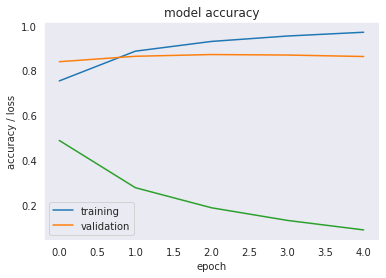

In [37]:
import matplotlib.pyplot as plt
loss,accuracy1  = model.evaluate(X_test, y_test, verbose=False)
print("model accuracy :" , accuracy1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()